In [2]:
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
cluster = kmedoids(iris.data[:,0:2],[3,12,20])

In [6]:
cluster.get_medoids()

[3, 12, 20]

In [7]:
# treinamento/agrupamento
cluster.process()

In [9]:
previsoes = cluster.get_clusters()
previsoes

[[7,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  106],
 [67,
  53,
  55,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  68,
  69,
  70,
  71,
  72,
  73,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  113,
  114,
  119,
  121,
  123,
  126,
  127,
  133,
  134,
  138,
  142,
  146,
  149],
 [112,
  50,
  51,
  52,
  54,
  56,
  58,
  65,
  74,
  75,
  76,
  77,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  115,
  116,
  117,
  118,
  120,
  122,
  124,
  125,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  139,
  140,
  141,
  143,
  144,
  145,
  147,
  148]]

In [11]:
#centro de um cluster
medoides = cluster.get_medoids()
medoides

[7, 67, 112]

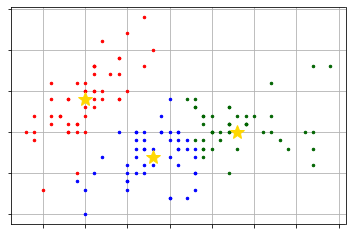

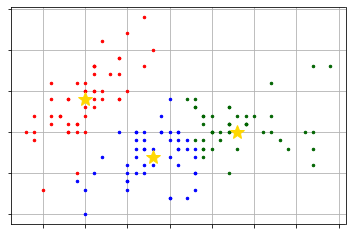

In [18]:
v = cluster_visualizer()
v.append_clusters(previsoes, data = iris.data[:, 0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = '*', markersize = 15)
v.show()

In [20]:
lista_previsoes = []
lista_real = []

for i in range(len(previsoes)):
    for j in range(len(previsoes[i])):
        lista_previsoes.append(i)
        lista_real.append(iris.target[previsoes[i][j]])

In [22]:
lista_previsoes = np.asarray(lista_previsoes)
lista_real =  np.asarray(lista_real)

In [23]:
resultados = confusion_matrix(lista_real, lista_previsoes)
resultados

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 1, 14, 35]], dtype=int64)